In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#df=pd.read_csv('train.csv')
df=pd.read_csv('Porto_taxi_data_test_partial_trajectories.csv')

In [3]:
#print(df.head())
df.sample(frac=0.1)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
302,T310,A,73071.0,NaN,20000548,1419171991,A,False,"[[-8.668575, 41.157891000000006], [-8.668575, ..."
73,T74,C,NaN,NaN,20000256,1408038045,A,False,"[[-8.660421, 41.172516], [-8.660421, 41.172516..."
133,T139,C,NaN,NaN,20000473,1412065618,A,False,"[[-8.571726, 41.177358000000005], [-8.572104, ..."
85,T86,A,36752.0,NaN,20000116,1412065159,A,False,"[[-8.615574, 41.176404], [-8.615637, 41.176431..."
225,T233,B,NaN,1.0,20000167,1412617036,A,False,"[[-8.609463, 41.177223], [-8.609364, 41.177277..."
62,T63,C,NaN,NaN,20000649,1408038908,A,False,"[[-8.582184, 41.180057999999995], [-8.58230100..."
72,T73,B,NaN,15.0,20000334,1408039046,A,False,"[[-8.585595000000001, 41.148531], [-8.585676, ..."
20,T21,B,NaN,15.0,20000460,1408039125,A,False,"[[-8.585712000000001, 41.148540000000004], [-8..."
249,T257,B,NaN,23.0,20000406,1414813904,A,False,"[[-8.61282, 41.145957], [-8.612748, 41.1459480..."
239,T247,B,NaN,13.0,20000603,1414813943,A,False,"[[-8.628489, 41.157522], [-8.628264, 41.157675..."


In [4]:
#Change the Unix Date to the datetime stamp
df['TIMESTAMP'] = df['TIMESTAMP'].astype('int')
df['TIMESTAMP']=df['TIMESTAMP'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [5]:
#print(df.head())

In [6]:
# Take the start point of the and round off to the 
from ast import literal_eval
df['POLYLINE']=df['POLYLINE'].apply( lambda x: literal_eval(str(x)))
df=df[df['POLYLINE'].map(lambda d: len(d)) > 0]

#creating different col for Long and Lati
df['LONG']=df['POLYLINE'].apply( lambda x: round(x[0][0],2))
df['LATI']=df['POLYLINE'].apply( lambda x: round(x[0][1],2))

#Dropping the POLYLINE
df.drop('POLYLINE',axis=1,inplace=True)
print(df.head())

  TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID            TIMESTAMP  \
0      T1         B          NaN          15.0  20000542  2014-08-14 17:57:17   
1      T2         B          NaN          57.0  20000108  2014-08-14 17:50:11   
2      T3         B          NaN          15.0  20000370  2014-08-14 17:49:28   
3      T4         B          NaN          53.0  20000492  2014-08-14 17:58:10   
4      T5         B          NaN          18.0  20000621  2014-08-14 17:59:37   

  DAY_TYPE  MISSING_DATA        POLYLINE  
0        A         False  [-8.59, 41.15]  
1        A         False  [-8.61, 41.15]  
2        A         False  [-8.59, 41.15]  
3        A         False  [-8.61, 41.14]  
4        A         False  [-8.62, 41.15]  


In [7]:
# converting the value of TIMESTAMP to the datetime and nearest 15 min
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['TIMESTAMP']=df['TIMESTAMP'].dt.round('15min')  

In [8]:
#splitting the time and date 
df['DATE']=pd.to_datetime(df['TIMESTAMP']).dt.date
df['TIME']=pd.to_datetime(df['TIMESTAMP']).dt.time
# Dropping the timestamp
df.drop('TIMESTAMP',axis=1,inplace=True)

In [10]:
df.groupby(['DATE','TIME','LONG','LATI']).size().to_frame(name='TAXI_COUNT').reset_index()

,DATE,TIME,LONG,LATI,TAXI_COUNT
0,2014-08-14,16:00:00,-8.62,41.18,1
1,2014-08-14,17:15:00,-8.69,41.17,1
2,2014-08-14,17:15:00,-8.67,41.16,1
3,2014-08-14,17:15:00,-8.67,41.19,1
4,2014-08-14,17:15:00,-8.63,41.21,1
...,...,...,...,...,...
173,2014-12-21,14:30:00,-8.62,41.14,1
174,2014-12-21,14:30:00,-8.62,41.16,3
175,2014-12-21,14:30:00,-8.61,41.14,2
176,2014-12-21,14:30:00,-8.61,41.17,1


<AxesSubplot:xlabel='LONG,LATI'>

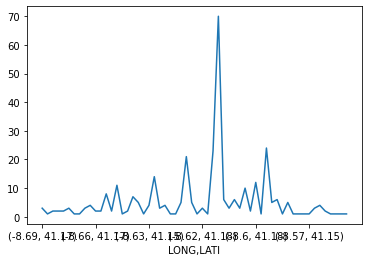

In [11]:
df.groupby(['LONG','LATI']).size().plot()